In [3]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
import numpy as np
import math
from scipy import stats


%pylab inline

Populating the interactive namespace from numpy and matplotlib


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

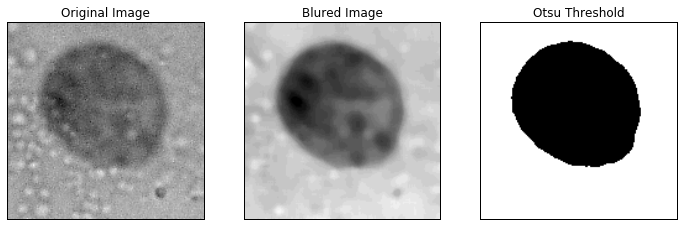

In [4]:
pylab.rcParams['figure.figsize'] = (12, 8)

img_noblur = cv2.imread('Tests/1_1.bmp',0)
img_blured = cv2.medianBlur(img_noblur,11)
thresh, mask = cv2.threshold(img_blured,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

img = np.array(img_blured)

plt.subplot(1,3,1),plt.imshow(img_noblur,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(1,3,2),plt.imshow(img_blured,'gray')
plt.title('Blured Image')
plt.xticks([]),plt.yticks([])

plt.subplot(1,3,3),plt.imshow(mask,'gray')
plt.title('Otsu Threshold')
plt.xticks([]),plt.yticks([])

In [5]:
def apply_mask(img, mask, background_value=0):
    n, m = mask.shape
    assert (n, m) == img.shape
    for i in range(n):
        for j in range(m):
            if mask[i][j] == background_value:
                img[i][j] = 0

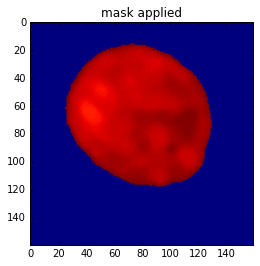

In [6]:
pylab.rcParams['figure.figsize'] = (4, 4)
apply_mask(img, mask, 255)
plt.imshow(img)
plt.title('mask applied')

In [7]:
def generate_eps(start_size=5, stop_size=60, step=1):
    return (start_size + step*x for x in range((stop_size - start_size)//step))
    
def box_count(img, sqrt_eps, background_value=0):
    N, M = img.shape    
    n = N // sqrt_eps
    m = M // sqrt_eps  
    
    count = 0
    contains = False
    for i in range(n+1):
        for j in range(m+1):
            contains = False
            for a in range(sqrt_eps):
                if contains:
                    break
                for b in range(sqrt_eps):
                    if contains:
                        break
                    if (i*sqrt_eps+a < N) and (j*sqrt_eps+b < M):
                        if not img[i*sqrt_eps+a][j*sqrt_eps+b] == background_value:
                            contains = True
                            count += 1
    return count
    
def box_count_rude(source_img, sqrt_eps, background_value=0):
    N, M = source_img.shape    
        
    d = dict([])
    count = 0
    contains = False
    for i in range(N):
        for j in range(M):
            if source_img[i][j] != background_value:
                d[(i // sqrt_eps, j // sqrt_eps)] = 1        
                        
    return len(d)

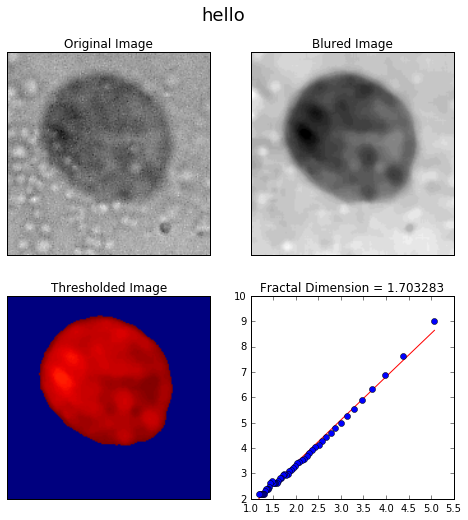

In [8]:
pylab.rcParams['figure.figsize'] = (8, 8)

x = []
y = []
gen = generate_eps(start_size=1, stop_size=50, step=1)
for eps in gen:    
    count = box_count(img, eps, 0)
    eps = eps / max(img.shape)
    x += [-1.0 * math.log(eps)]    
    y += [math.log(count)]

slope, intercept = np.polyfit(x, y, 1)
line = [slope*a+intercept for a in x]  # regression line

plt.suptitle("hello", size=18)

plt.subplot(2,2,1),plt.imshow(img_noblur,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,2),plt.imshow(img_blured,'gray')
plt.title('Blured Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3),plt.imshow(img)
plt.title('Thresholded Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,4),plot(x,line,'r-',x,y,'o')
plt.title('Fractal Dimension = %f' % slope)


In [9]:
def box_count_contour(source_img, sqrt_eps, background_value=0):
    N, M = source_img.shape    
    n = N // sqrt_eps
    m = M // sqrt_eps  
    
    inner = np.full((n+1, m+1), False)
    outer = np.full((n+1, m+1), False)
    
    for i in range(N):
        for j in range(M):
            if source_img[i][j] == background_value:
                outer[i//sqrt_eps][j//sqrt_eps] = True
            else:
                inner[i//sqrt_eps][j//sqrt_eps] = True
    """
    count = 0
    contains = False
    for i in range(n+1):
        for j in range(m+1):
            contains_background = False
            contains_inner = False
            for a in range(sqrt_eps):
                if contains_inner and contains_background:
                    break
                for b in range(sqrt_eps):
                    if contains_inner and contains_background:
                        break
                    if (i*sqrt_eps+a < N) and (j*sqrt_eps+b < M):
                        contains_inner = contains_inner or (source_img[i*sqrt_eps+a][j*sqrt_eps+b] != background_value)
                        contains_background = contains_background or (source_img[i*sqrt_eps+a][j*sqrt_eps+b] == background_value)                        
                        #if not img[i*sqrt_eps+a][j*sqrt_eps+b] == background_value:
            if contains_inner and contains_background:
                count += 1
    """
    count = 0
    for i in range(n+1):
        for j in range(m+1):
            if inner[i][j] and outer[i][j]:
                count += 1
    return count

/usr/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((33, 33), False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((27, 27), False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((23, 23), False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((21, 21), False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((18, 18), False) will return 

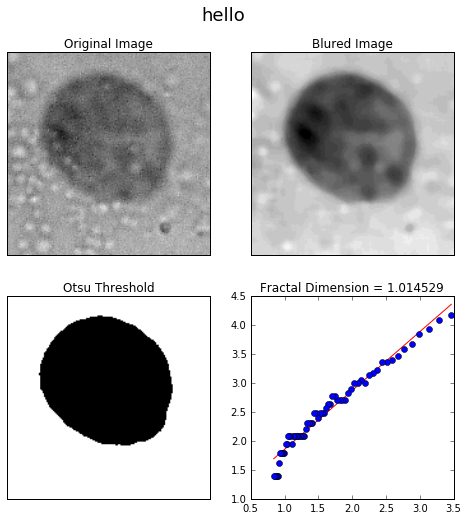

In [14]:
pylab.rcParams['figure.figsize'] = (8, 8)

x = []
y = []
gen = generate_eps(5, 70, 1)
for eps in gen:    
    count = box_count_contour(img, eps, 0)    
    eps = eps / max(img.shape)
    x += [-1.0 * math.log(eps)]        
    y += [math.log(count)]

slope, intercept = np.polyfit(x, y, 1)
line = [slope*a+intercept for a in x]  # regression line

plt.suptitle("hello", size=18)

plt.subplot(2,2,1),plt.imshow(img_noblur,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,2),plt.imshow(img_blured,'gray')
plt.title('Blured Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3),plt.imshow(mask,'gray')
plt.title('Otsu Threshold')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,4),plot(x,line,'r-',x,y,'o')
plt.title('Fractal Dimension = %f' % slope)



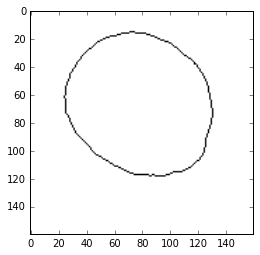

In [11]:
pylab.rcParams['figure.figsize'] = (4, 4)

thresh = np.copy(mask)
white_img = np.full(img_noblur.shape, 255, dtype=thresh.dtype)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(white_img, contours, 1, (0,0,0), 1)
plt.imshow(white_img, 'gray')

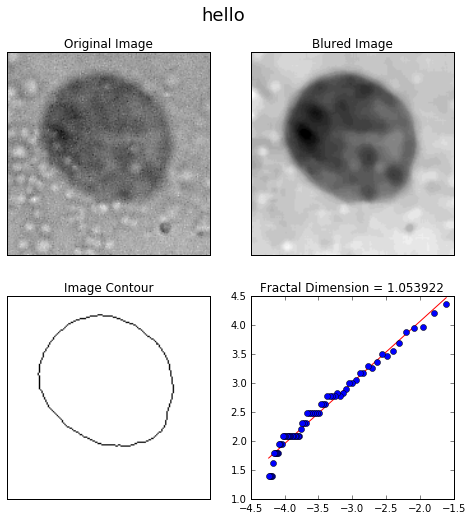

In [15]:
pylab.rcParams['figure.figsize'] = (8, 8)

x = []
y = []
gen = generate_eps(5, 70, 1)
for eps in gen:    
    count = box_count(white_img, eps, 255)
    
    x += [-1.0 * math.log(eps)]    
    y += [math.log(count)]

slope, intercept = np.polyfit(x, y, 1)

#A = np.vstack([x, np.ones(len(x))]).T
#slope, intercept = np.linalg.lstsq(A, y)[0]
line = [slope*a+intercept for a in x]

plt.suptitle("hello", size=18)

plt.subplot(2,2,1),plt.imshow(img_noblur,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,2),plt.imshow(img_blured,'gray')
plt.title('Blured Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3),plt.imshow(white_img,'gray')
plt.title('Image Contour')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,4),plot(x,line,'r-',x,y,'o')
plt.title('Fractal Dimension = %f' % slope)


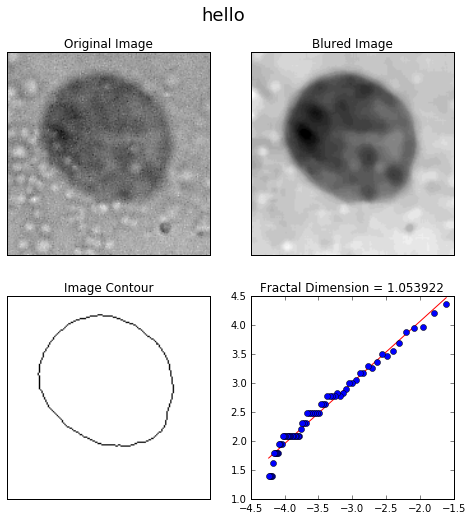

In [13]:
pylab.rcParams['figure.figsize'] = (8, 8)

x = []
y = []
gen = generate_eps(5, 70, 1)
for eps in gen:    
    count = box_count_rude(white_img, eps, 255)
    
    x += [-1.0 * math.log(eps)]    
    y += [math.log(count)]

slope, intercept = np.polyfit(x, y, 1)

#A = np.vstack([x, np.ones(len(x))]).T
#slope, intercept = np.linalg.lstsq(A, y)[0]
line = [slope*a+intercept for a in x]

plt.suptitle("hello", size=18)

plt.subplot(2,2,1),plt.imshow(img_noblur,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,2),plt.imshow(img_blured,'gray')
plt.title('Blured Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3),plt.imshow(white_img,'gray')
plt.title('Image Contour')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,4),plot(x,line,'r-',x,y,'o')
plt.title('Fractal Dimension = %f' % slope)
